In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.16/00
3.6.6 (default, Mar 29 2019, 00:03:27) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-36)]


In [314]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()

bkg_path = "/mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/bkg/normalized/"

lumi = 137000 #in pb-1

fpath_bkg['QCD'] = bkg_path+"QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['DYJetsToLL'] = bkg_path+"DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
fpath_bkg['TTJets_DiLept'] = bkg_path+"TTJets_DiLept_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['TTJets_SingleLeptFromTbar'] = bkg_path+"TTJets_SingleLeptFromTbar_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['TTJets_SingleLeptFromT'] = bkg_path+"TTJets_SingleLeptFromT_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_Pt-100ToInf_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
fpath_bkg['ZJetsToNuNu'] = bkg_path+"ZJetsToNuNu_Zpt-200toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"

for k,v in fpath_bkg.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
    tree_bkg[k] = root_dir['vH']
#     tree[k] = root_dir['ntuples']
    a = tree_bkg[k]["jetPt"].array()
    print (a[:-1][0])
    print(a.shape)

QCD /mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/bkg/normalized/QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root
[584.21387  462.4421    86.01361   58.527615]
(586375,)
DYJetsToLL /mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/bkg/normalized/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root
[148.176     64.903656  34.703403  26.470406]
(4912067,)
TTJets_DiLept /mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/bkg/normalized/TTJets_DiLept_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root
[89.60368 68.89455 32.75672]
(13983502,)
TTJets_SingleLeptFromTbar /mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/bkg/normalized/TTJets_SingleLeptFromTbar_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root
[133.12325  110.88221   91.79309   67.75914   55.329487  32.133587
  20.659573]
(16724359,)
TTJets_Singl

In [401]:
wH = 1

if wH:
    sig_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/signals/wH/'
else:    
    sig_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/signals/zH/'

fpath_sig['bbbb'] = sig_path + 'ppTohToSS1SS2_SS1Tobb_SS2Tobb_vh_withISR_mh125_mx50_pl1000_ev100000_Job0_Of_0_1pb_weighted.root'
fpath_sig['met+bb'] = sig_path + 'ppTohToSS1SS2_SS1Tobb_SS2Toveve_vh_withISR_mh125_mx50_pl1000_ev100000_Job0_Of_0_1pb_weighted.root'



for k,v in fpath_sig.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
    tree_sig[k] = root_dir['vH']
#     tree[k] = root_dir['ntuples']
    a = tree_sig[k]["jetPt"].array()
    print (a[:-1][0])
    print(a.shape)

bbbb /mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/signals/wH/ppTohToSS1SS2_SS1Tobb_SS2Tobb_vh_withISR_mh125_mx50_pl1000_ev100000_Job0_Of_0_1pb_weighted.root
[100.53213  47.65758  30.41329]
(1825,)
met+bb /mnt/hadoop/store/group/phys_exotica/delayedjets/llp_analyzer/V1p0/MC_Summer16/v1/signals/wH/ppTohToSS1SS2_SS1Tobb_SS2Toveve_vh_withISR_mh125_mx50_pl1000_ev100000_Job0_Of_0_1pb_weighted.root
[81.29005  26.601665]
(648,)


In [402]:
trigger_names_file = '/nfshome/christiw/llp/delayed_jet_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])
    if wH:
        trigger_paths = [87,135] #PFMET120
    else:
        trigger_paths = [177,362,87,135] #PFMET120

# 177 HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ
# 362 HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ
# 310 HLT_PFMET120_PFMHT120_IDTight
# 87 HLT_Ele32_WPTight_Gsf
# 135 HLT_IsoMu24
# 310 PFMET


In [403]:
arrays_ev = [
    'met','metPhi'
]
arrays_jet = [
    "jetPt", "jetEta", "jetPhi","jetTime"
    
]
arrays_lep = [
    "lepPt", "lepEta", "lepPhi","lepE"   
]

In [441]:
met_cut = 30 #GeV
jetTime_cut = 1 #ns

jet1Pt_bkg = {}
jet2Pt_bkg = {}
met_bkg = {}
metPhi_bkg = {}
mass_bkg = {} #mt if wH, Mz if zH
weight_bkg = {}
sel_ev = {}
jetEta_bkg = {}
jetPhi_bkg = {}
jetTime_bkg = {}
lepPt_bkg = {}
lepEta_bkg = {}
lepPhi_bkg = {}
start_t = time.time()
for k in tree_bkg.keys():
    if k == "QCD" or True:
        T = tree_bkg[k]
        hlt = T['HLTDecision'].array()
        jet1Pt_temp = T.array('jetPt')[:,0]
        jet2Pt_temp = T.array('jetPt')[:,1]
        jetTime_temp = T.array('jetTime')
        temp = []
        for ev in jetTime_temp:
            temp.append(np.max(ev))
        jetTime_temp_1 = np.array(temp)
        jetEta_temp = T.array('jetEta')[:,0]
        jetPhi_temp = T.array('jetPhi')[:,0]

        lepPt_temp = T.array('lepPt')[:,0]
        lepEta_temp = T.array('lepEta')[:,0]
        lepPhi_temp = T.array('lepPhi')[:,0]
        lepE_temp = T.array('lepE')[:,0]

        metPhi_temp = T.array('metPhi')
        met_temp = T.array('met')
        weight_temp = T.array('weight')
        nLeptons_temp = T.array('nLeptons')
        lepPdgId = T.array('lepPdgId')[:,0]
        #MT
        if wH:
            mt_temp = []
            for i in range(len(met_temp)):
                lep = rt.TLorentzVector()
                neu = rt.TLorentzVector()
                lep.SetPtEtaPhiE(lepPt_temp[i],lepEta_temp[i],lepPhi_temp[i],lepE_temp[i])
                neu.SetPtEtaPhiM(met_temp[i],0,metPhi_temp[i],0)
                neu.SetPz(0)
                neu.SetE(neu.Pt())
                mt = (lep+neu).Mt()
                mt_temp.append(mt)
            mass_temp = np.array(mt_temp)
        else:
            mass_temp = T.array('ZMass')
        # select only triggered events
        sel_ev[k] = np.zeros(hlt[:,0].shape)
        for tr in trigger_paths:
            sel_ev[k]  = np.logical_or(sel_ev[k],hlt[:,tr])
        if not wH: #additional ZH cuts
            sel_ev[k] = np.logical_and(sel_ev[k], nLeptons_temp >= 2) 
            sel_ev[k] = np.logical_and(sel_ev[k], abs(mass_temp-Z_MASS) < 30) 
        sel_ev[k] = np.logical_and(sel_ev[k],weight_temp < 1) # git rid of weights > 1
        sel_ev[k] = np.logical_and(sel_ev[k],np.logical_not(np.isnan(jetTime_temp_1))) # git rid of weights > 1
                                                                # also get rid of jets with nan jetTime
        sel_ev[k] = np.logical_and(sel_ev[k], nLeptons_temp == 1 ) # request only 1 lepton
#         sel_ev[k] = np.logical_and(sel_ev[k], abs(lepPdgId) == 11 ) # request only 1 lepton
#         sel_ev[k] = np.logical_and(sel_ev[k], lepPt_temp >= 30 ) # request only 1 lepton

#         sel_ev[k] = np.logical_and(sel_ev[k],met_temp > met_cut) # add met cut
#         sel_ev[k] = np.logical_and(sel_ev[k], (jetTime_temp > jetTime_cut).any()) # add jet Time cut

        # assign after selection
        jet1Pt_bkg[k] = jet1Pt_temp[sel_ev[k]]
        jet2Pt_bkg[k] = jet2Pt_temp[sel_ev[k]]
        jetTime_bkg[k] = jetTime_temp_1[sel_ev[k]]
        jetEta_bkg[k] = jetEta_temp[sel_ev[k]]
        jetPhi_bkg[k] = jetPhi_temp[sel_ev[k]]

        lepPt_bkg[k] = lepPt_temp[sel_ev[k]]
        lepEta_bkg[k] = lepEta_temp[sel_ev[k]]
        lepPhi_bkg[k] = lepPhi_temp[sel_ev[k]]

        metPhi_bkg[k] = metPhi_temp[sel_ev[k]]
        met_bkg[k] = met_temp[sel_ev[k]]
        weight_bkg[k] = weight_temp[sel_ev[k]] * lumi
        
        leppt = T.array('lepPt')[sel_ev[k]]
        count = 0.0
        for pt in leppt:
            if pt > 25:
                count += 1
        print(count/len(leppt))

        print(k,len(met_bkg[k]),sum(weight_bkg[k]),(time.time()-start_t))
        start_t = time.time()
    else:
        print(k)

0.9324796274738067
QCD 4295 12925858.773739059 22.42567253112793
0.9463820600320356
DYJetsToLL 574360 5403908.879309893 172.00706124305725
0.9231799433404272
TTJets_DiLept 3425017 1337108.0269337608 492.11666536331177


KeyboardInterrupt: 

In [439]:
met_cut = 30 #GeV
jetTime_cut = 1 #ns
Z_MASS   = 91.2

jet1Pt_sig = {}
jet2Pt_sig = {}
met_sig = {}
metPhi_sig = {}
mass_sig = {} #mt if wH, Mz if zH
weight_sig = {}
sel_ev_sig = {}
jetEta_sig = {}
jetPhi_sig = {}
jetTime_sig = {}
lepPt_sig = {}
lepEta_sig = {}
lepPhi_sig = {}
start_t = time.time()
for k in tree_sig.keys():
    T = tree_sig[k]
    hlt = T['HLTDecision'].array()
    jet1Pt_temp = T.array('jetPt')[:,0]
    jet2Pt_temp = T.array('jetPt')[:,1]
    jetTime_temp = T.array('jetTime')
    temp = []
    for ev in jetTime_temp:
        temp.append(np.max(ev))
    jetTime_temp_1 = np.array(temp)
    jetEta_temp = T.array('jetEta')[:,0]
    jetPhi_temp = T.array('jetPhi')[:,0]

    lepPt_temp = T.array('lepPt')[:,0]
    lepEta_temp = T.array('lepEta')[:,0]
    lepPhi_temp = T.array('lepPhi')[:,0]
    lepE_temp = T.array('lepE')[:,0]
    metPhi_temp = T.array('metPhi')
    met_temp = T.array('met')
    weight_temp = T.array('weight')
    nLeptons_temp = T.array('nLeptons')
    lepPdgId = T.array('lepPdgId')[:,0]
    #MT
    if wH:
        mt_temp = []
        for i in range(len(met_temp)):
            lep = rt.TLorentzVector()
            neu = rt.TLorentzVector()
            lep.SetPtEtaPhiE(lepPt_temp[i],lepEta_temp[i],lepPhi_temp[i],lepE_temp[i])
            neu.SetPtEtaPhiM(met_temp[i],0,metPhi_temp[i],0)
            neu.SetPz(0)
            neu.SetE(neu.Pt())
            mt = (lep+neu).Mt()
            mt_temp.append(mt)
        mass_temp = np.array(mt_temp)
    else:
        mass_temp = T.array('ZMass')

    # select only triggered events
    sel_ev[k] = np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:
        sel_ev[k]  = np.logical_or(sel_ev[k],hlt[:,tr])
    sel_ev[k] = np.logical_and(sel_ev[k],weight_temp < 1) # git rid of weights > 1
    sel_ev[k] = np.logical_and(sel_ev[k],np.logical_not(np.isnan(jetTime_temp_1))) # git rid of weights > 1
                                                            # also get rid of jets with nan jetTime
    if not wH: #additional ZH cuts
        sel_ev[k] = np.logical_and(sel_ev[k], nLeptons_temp >= 2) 
        sel_ev[k] = np.logical_and(sel_ev[k], abs(mass_temp-Z_MASS) < 30) 

    sel_ev[k] = np.logical_and(sel_ev[k], nLeptons_temp == 1 ) # request only 1 lepton
#     sel_ev[k] = np.logical_and(sel_ev[k], abs(lepPdgId) == 11 ) # request only 1 lepton
#     sel_ev[k] = np.logical_and(sel_ev[k],met_temp > met_cut) # add met cut
#     sel_ev[k] = np.logical_and(sel_ev[k], (jetTime_temp > jetTime_cut).any()) # add jet Time cut
    
    
    # assign after selection
    jet1Pt_sig[k] = jet1Pt_temp[sel_ev[k]]
    jet2Pt_sig[k] = jet2Pt_temp[sel_ev[k]]
    jetTime_sig[k] = jetTime_temp_1[sel_ev[k]]
    jetEta_sig[k] = jetEta_temp[sel_ev[k]]
    jetPhi_sig[k] = jetPhi_temp[sel_ev[k]]

    lepPt_sig[k] = lepPt_temp[sel_ev[k]]
    lepEta_sig[k] = lepEta_temp[sel_ev[k]]
    lepPhi_sig[k] = lepPhi_temp[sel_ev[k]]

    metPhi_sig[k] = metPhi_temp[sel_ev[k]]
    met_sig[k] = met_temp[sel_ev[k]]
    mass_sig[k] = mass_temp[sel_ev[k]]
    weight_sig[k] = weight_temp[sel_ev[k]] * lumi
    leppt = T.array('lepPt')[sel_ev[k]]
    count = 0.0
    for pt in leppt:
        if pt > 25:
            count += 1
    print(count/len(leppt))


    print(k,len(weight_sig[k]),sum(weight_sig[k]))
    start_t = time.time()


0.9651639344262295
bbbb 488 1190.5420317780226
0.9700598802395209
met+bb 167 598.5761456213368


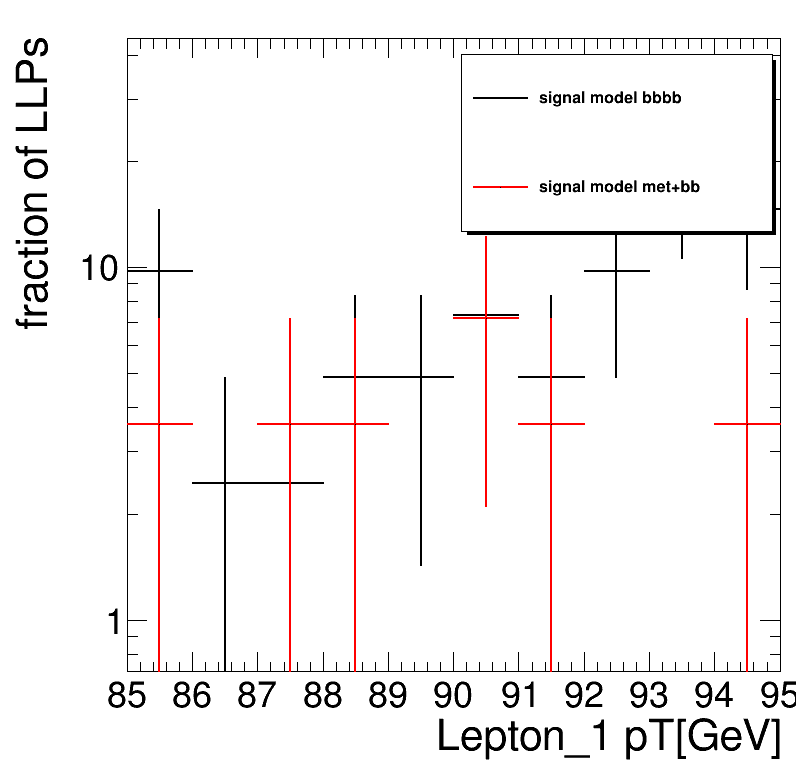

In [410]:
# Plotting mass
c = rt.TCanvas('c','c', 800, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.97,0.93)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

i = 0
for k,v in mass_sig.items():
#     print(v)
    h[k] = create_TH1D( v, axis_title=['Lepton_1 pT[GeV]', 'fraction of LLPs'], name=k, binning=[10,85,95],weights = weight_sig[k])
    h[k].SetLineColor(std_color_list[i])
    leg.AddEntry(h[k],'signal model ' + k)
    h[k].Draw('same')
    i+=1


leg.Draw()


if setlog: 
    c.SetLogy()
c.Draw()


DYJetsToLL
TTJets_DiLept
QCD
TTJets_SingleLeptFromTbar
TTJets_SingleLeptFromT
WJetsToLNu
ZJetsToNuNu


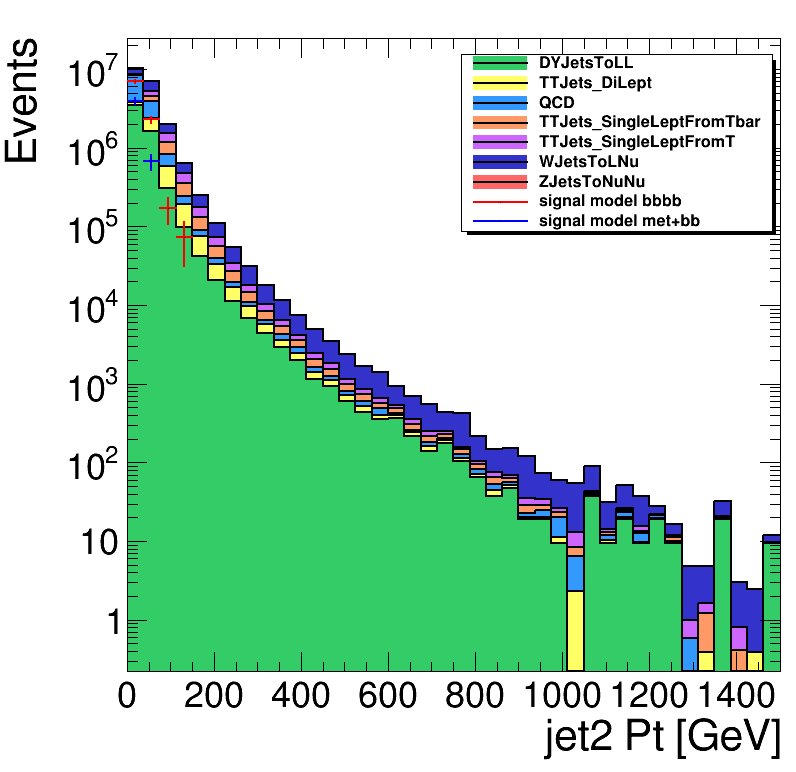

In [413]:
# Plotting THStack
c = rt.TCanvas('c','c', 800, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.97,0.93)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)
stack = rt.THStack( "hs" , "Hgg Stack " )
color_list = [845,393,861,806,876,597,625]
var_bkg = [jet1Pt_bkg, jet2Pt_bkg, jetTime_bkg, jetEta_bkg, jetPhi_bkg, lepPt_bkg, lepEta_bkg, lepPhi_bkg, metPhi_bkg, met_bkg, weight_bkg]
var_sig = [jet1Pt_sig, jet2Pt_sig, jetTime_sig, jetEta_sig, jetPhi_sig, lepPt_sig, lepEta_sig, lepPhi_sig, metPhi_sig, met_sig, weight_sig]
xaxis = ['jet1 Pt [GeV]', 'jet2 Pt [GeV]', 'jetTime [ns]', 'jet #eta', 'jet #phi', 'lepton Pt [GeV]', 'lepton #eta', 'lepton #phi', 'met #phi', 'met [GeV]', 'weight']
save = ['nocut_jet1Pt', 'nocut_jet2Pt', 'nocut_jetTime', 'nocut_jetEta', 'nocut_jetPhi', 'nocut_lepPt', 'nocut_lepEta', 'nocut_lepPhi', 'nocut_metPhi', 'nocut_met', 'nocut_weight']

bins = [[40,0,1000],[40,0,1500],[40,-5,11],[20,-2.5,2.5],[20,-5,5],[40,0,1000],[20,-3,3],[20,-5,5],[20,-4,4],[40,0,500],[10,0,1]]
setlog = [1,1,0,0,0,1,0,0,0,1,0]
bkg_keys = ['DYJetsToLL','TTJets_DiLept','QCD','TTJets_SingleLeptFromTbar','TTJets_SingleLeptFromT','WJetsToLNu','ZJetsToNuNu']

var_i =1

i=0
norm = 0

for k in bkg_keys:
    v = var_bkg[var_i][k]
    h[k] = create_TH1D( v, axis_title=['Lepton_1 pT [GeV]', 'fraction of LLPs'], name=k, binning=bins[var_i],weights = weight_bkg[k])
    h[k].SetFillColor(color_list[i])
    stack.Add( h[k])
    leg.AddEntry(h[k],k)
    print(k)
    norm += sum(weight_bkg[k])
    i+=1

stack.Draw('HIST')
i = 1
for k,v in var_sig[var_i].items():
    h[k] = create_TH1D( v, axis_title=['Lepton_1 pT[GeV]', 'fraction of LLPs'], name=k, binning=bins[var_i],weights = 10000*weight_sig[k])
    h[k].SetLineColor(std_color_list[i])
    leg.AddEntry(h[k],'signal model ' + k)
    h[k].Draw('same')
    i+=1


leg.Draw()
stack.GetXaxis().SetTitle(xaxis[var_i])
stack.GetYaxis().SetTitle("Events")
stack.GetYaxis().SetTitleOffset(1.4)
if var_i ==2:
    stack.SetMaximum(10e6*8)
if var_i ==3 or var_i == 4 or var_i == 6 or var_i == 7 or var_i == 8:
#     stack.SetMaximum(10e6*5)
    stack.SetMaximum(10e7*8)

stack.SetMinimum(1)


if setlog: 
    c.SetLogy()
c.Draw()
c.SaveAs("../plots/stackplot_zh_"+save[var_i]+"_signalscaled-10e3.pdf")
